In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# 1. Data Collection: Load sales data from CSV file
file_path = 'sales_data.csv'  # Replace with your file path
sales_data = pd.read_csv(file_path)


In [3]:
# Display the first few rows of the dataset to understand its structure
print(sales_data.head())

         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike         

In [4]:

# Check for missing values
print(sales_data.isnull().sum())

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


In [6]:
# Handle missing values (example: filling missing sales data with the mean)
sales_data['Profit'].fillna(sales_data['Profit'].mean(), inplace=True)

# Convert date column to datetime format (if applicable)
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Extract year, month, and day for easier time-based analysis
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Day'] = sales_data['Date'].dt.day


In [8]:
# Total sales per product
sales_by_product = sales_data.groupby('Product')['Profit'].sum().reset_index()
print(sales_by_product)

                            Product   Profit
0                      AWC Logo Cap    78008
1            All-Purpose Bike Stand   201064
2             Bike Wash - Dissolver   116008
3             Fender Set - Mountain   749041
4             Half-Finger Gloves, L   166721
5             Half-Finger Gloves, M   152834
6             Half-Finger Gloves, S   191760
7               Hitch Rack - 4-Bike   305326
8           Hydration Pack - 70 oz.   571693
9        Long-Sleeve Logo Jersey, L   112342
10       Long-Sleeve Logo Jersey, M    92940
11       Long-Sleeve Logo Jersey, S    79630
12      Long-Sleeve Logo Jersey, XL    76767
13             Mountain Bottle Cage   189009
14           Mountain-100 Black, 38    54388
15           Mountain-100 Black, 42    54817
16           Mountain-100 Black, 44    59270
17           Mountain-100 Black, 48    58530
18          Mountain-100 Silver, 38    96998
19          Mountain-100 Silver, 42    28450
20          Mountain-100 Silver, 44    52602
21        

In [9]:
monthly_sales = sales_data.groupby(['Year', 'Month'])['Profit'].sum().reset_index()


In [12]:
# Sales by region
sales_by_region = sales_data.groupby('Country')['Revenue'].sum().reset_index()
print(sales_by_region)

          Country  Revenue
0       Australia  7784419
1          Canada  3046821
2          France  2562679
3         Germany  3087134
4  United Kingdom  3697657
5   United States  9149452


<ipython-input-14-c32055a7a9ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Profit', data=sales_by_product, palette='viridis')


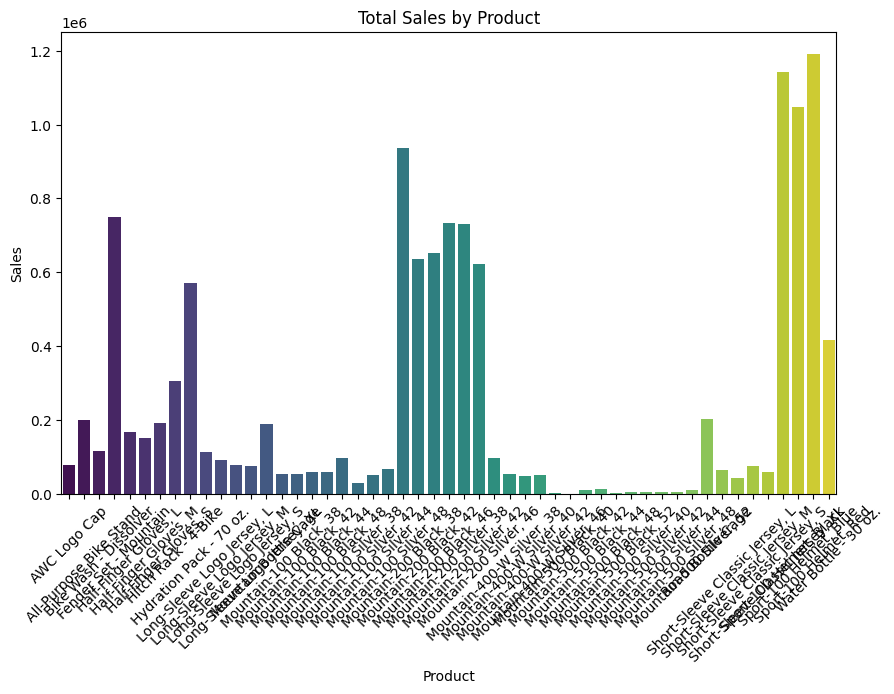

In [14]:
# Plot total sales per product
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Profit', data=sales_by_product, palette='viridis')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

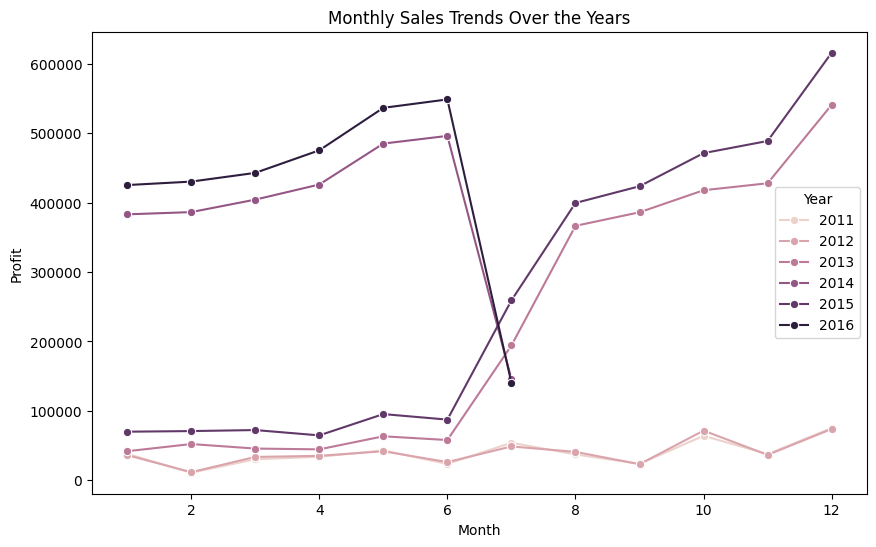

In [16]:
# Plot sales trends over time (monthly)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Profit', hue='Year', data=monthly_sales, marker="o")
plt.title('Monthly Sales Trends Over the Years')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

In [23]:

# Top-performing product
top_product = sales_by_product.loc[sales_by_product['Profit'].idxmax()]
print(f"Top-performing product: {top_product['Product']} with sales of {top_product['Profit']}")




Top-performing product: Sport-100 Helmet, Red with sales of 1191402
